05:04:43 - cmdstanpy - INFO - Chain [1] start processing
05:04:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 33.55811913223206
R² (Coefficient of Determination): 0.9730132804866544


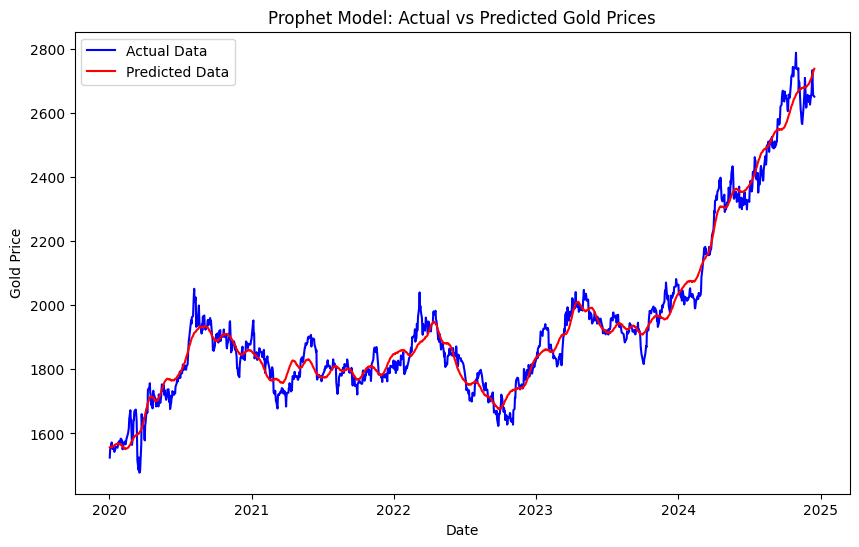

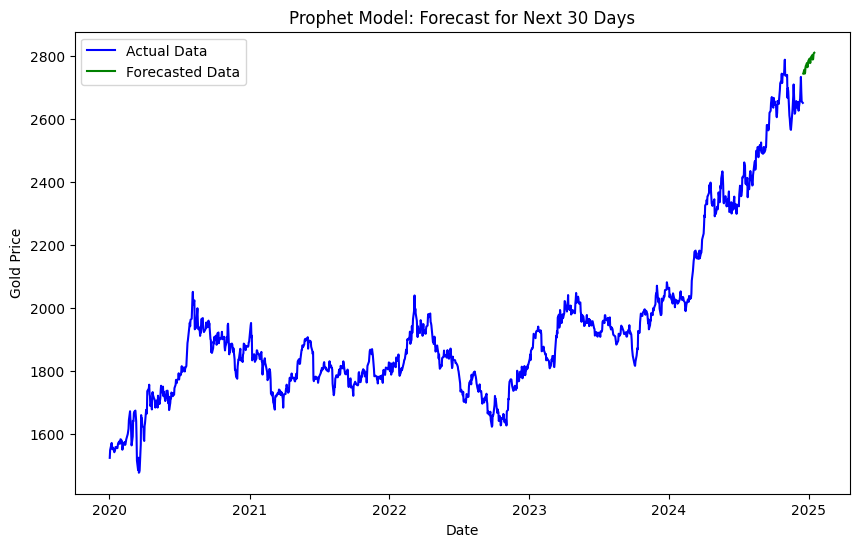

In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.metrics import mean_absolute_error, r2_score

data=pd.read_excel("gold_futures.xlsx")
data = data.rename(columns={'Date': 'ds', 'Close': 'y'})

prophet_model = Prophet()

prophet_model.fit(data)

last_date = data['ds'].max()
future_dates = pd.date_range(last_date, periods=31, freq='D')[1:]

future_df = pd.DataFrame(future_dates, columns=['ds'])


forecast = prophet_model.predict(future_df)

predictions = prophet_model.predict(data)

mae = mean_absolute_error(data['y'], predictions['yhat'])
r2 = r2_score(data['y'], predictions['yhat'])

print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² (Coefficient of Determination): {r2}')

plt.figure(figsize=(10, 6))
plt.plot(data['ds'], data['y'], label='Actual Data', color='blue')
plt.plot(data['ds'], predictions['yhat'], label='Predicted Data', color='red')
plt.title('Prophet Model: Actual vs Predicted Gold Prices')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(data['ds'], data['y'], label='Actual Data', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Data', color='green')
plt.title('Prophet Model: Forecast for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.metrics import mean_absolute_error, r2_score
from autots import AutoTS

data = pd.read_excel("gold_futures.xlsx")
data = data.rename(columns={'Date': 'ds', 'Close': 'y'})

data['ds'] = pd.to_datetime(data['ds'])

data.set_index('ds', inplace=True)

prophet_model = Prophet()


prophet_model.fit(data.reset_index())

last_date = data.index.max()
future_dates = pd.date_range(last_date, periods=31, freq='D')[1:]


future_df = pd.DataFrame(future_dates, columns=['ds'])


forecast_prophet = prophet_model.predict(future_df)


predictions_prophet = prophet_model.predict(data.reset_index())

mae_prophet = mean_absolute_error(data['y'], predictions_prophet['yhat'])
r2_prophet = r2_score(data['y'], predictions_prophet['yhat'])

auto_model = AutoTS(forecast_length=30, frequency='D')


auto_model.fit(data[['y']])

forecast_auto = auto_model.predict()


predictions_auto = forecast_auto['predicted_mean']


mae_auto = mean_absolute_error(data['y'], predictions_auto)
r2_auto = r2_score(data['y'], predictions_auto)

plt.figure(figsize=(10, 6))


plt.subplot(1, 2, 1)
plt.plot(data.index, data['y'], label='Actual Data', color='blue')
plt.plot(data.index, predictions_prophet['yhat'], label='Predicted Data', color='red')
plt.title('Prophet Model: Actual vs Predicted Gold Prices')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(data.index, data['y'], label='Actual Data', color='blue')
plt.plot(data.index, predictions_auto, label='Predicted Data', color='green')
plt.title('AutoTS Model: Actual vs Predicted Gold Prices')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()

plt.tight_layout()
plt.show()

metrics_data = pd.DataFrame({
    'Model': ['Prophet', 'AutoTS'],
    'MAE': [mae_prophet, mae_auto],
    'R²': [r2_prophet, r2_auto]
})

fig, ax = plt.subplots(figsize=(8, 5))
metrics_data.set_index('Model').plot(kind='bar', ax=ax)
plt.title('Model Performance Comparison (MAE and R²)')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("Prophet Model Evaluation:")
print(f'Mean Absolute Error (MAE): {mae_prophet}')
print(f'R² (Coefficient of Determination): {r2_prophet}')
print("\nAutoTS Model Evaluation:")
print(f'Mean Absolute Error (MAE): {mae_auto}')
print(f'R² (Coefficient of Determination): {r2_auto}')

05:09:02 - cmdstanpy - INFO - Chain [1] start processing
05:09:03 - cmdstanpy - INFO - Chain [1] done processing


Using 1 cpus for n_jobs.
Data frequency is: B, used frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 25
Model Number: 2 with model AverageValueNaive in generation 0 of 25
Model Number: 3 with model AverageValueNaive in generation 0 of 25
Model Number: 4 with model DatepartRegression in generation 0 of 25
Model Number: 5 with model DatepartRegression in generation 0 of 25


C:\Users\FAST LAPTOP\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 6 with model DatepartRegression in generation 0 of 25


C:\Users\FAST LAPTOP\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 7 with model DatepartRegression in generation 0 of 25



C:\Users\FAST LAPTOP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 0.4089
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4076
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4054
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4058
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4046
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4034
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4026
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4028
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4027
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4002
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3993
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4004
Epoch 13/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4007
Epoch 14/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4005
Epoch 15/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3999
Epoch 16/50
56/56 

C:\Users\FAST LAPTOP\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_data.py:3438: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda


Template Eval Error: Exception("Transformer PowerTransformer failed on fit from params rolling_mean_24 {'0': {}, '1': {'model': 'middle', 'decimals': 2, 'on_transform': False, 'on_inverse': True}, '2': {}} with error BracketError('The algorithm terminated without finding a valid bracket. Consider trying different initial points.')") in model 18 in generation 0: SeasonalNaive
Model Number: 19 with model SeasonalNaive in generation 0 of 25
Model Number: 20 with model SeasonalNaive in generation 0 of 25
Model Number: 21 with model VAR in generation 0 of 25
Template Eval Error: ValueError('Only gave one variable to VAR') in model 21 in generation 0: VAR
Model Number: 22 with model VAR in generation 0 of 25
Template Eval Error: ValueError('Only gave one variable to VAR') in model 22 in generation 0: VAR
Model Number: 23 with model WindowRegression in generation 0 of 25
Model Number: 24 with model ConstantNaive in generation 0 of 25


C:\Users\FAST LAPTOP\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 25 with model FBProphet in generation 0 of 25
Model Number: 26 with model DatepartRegression in generation 0 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 26 in generation 0: DatepartRegression
Model Number: 27 with model SeasonalNaive in generation 0 of 25
Model Number: 28 with model DatepartRegression in generation 0 of 25
Model Number: 29 with model ETS in generation 0 of 25
Model Number: 30 with model ARDL in generation 0 of 25
Model Number: 31 with model UnivariateMotif in generation 0 of 25
Model Number: 32 with model UnivariateMotif in generation 0 of 25
Model Number: 33 with model SectionalMotif in generation 0 of 25
Model Number: 34 with model SectionalMotif in generation 0 of 25
Model Number: 35 with model FBProphet in generation 0 of 25
Model Number: 36 with model SeasonalNaive in generation 0 of 25
Model Number: 37 with model DatepartRegression in generation 0 of 25
Model Number: 38 with model ARCH in g

05:11:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.


Model Number: 46 with model ARDL in generation 0 of 25
Model Number: 47 with model FFT in generation 0 of 25
Model Number: 48 with model BasicLinearModel in generation 0 of 25
Model Number: 49 with model BasicLinearModel in generation 0 of 25
Model Number: 50 with model SeasonalityMotif in generation 0 of 25
Model Number: 51 with model ETS in generation 0 of 25
Model Number: 52 with model FBProphet in generation 0 of 25
Model Number: 53 with model GLM in generation 0 of 25
Model Number: 54 with model UnivariateMotif in generation 0 of 25
Model Number: 55 with model ARDL in generation 0 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 55 in generation 0: ARDL
Model Number: 56 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 56 in generation 0: ARCH
Model Number: 57 with model ConstantNaive in generation 0 of 25
Model Number: 58 with model LastValueNaive i

C:\Users\FAST LAPTOP\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 64 with model DatepartRegression in generation 0 of 25
Model Number: 65 with model SectionalMotif in generation 0 of 25
Model Number: 66 with model RRVAR in generation 0 of 25
Model Number: 67 with model MetricMotif in generation 0 of 25
Model Number: 68 with model Cassandra in generation 0 of 25


C:\Users\FAST LAPTOP\AppData\Roaming\Python\Python312\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Template Eval Error: ValueError('Shape of passed values is (1225, 2), indices imply (1225, 1)') in model 68 in generation 0: Cassandra
Model Number: 69 with model SeasonalityMotif in generation 0 of 25
Model Number: 70 with model FFT in generation 0 of 25
Model Number: 71 with model BasicLinearModel in generation 0 of 25
Model Number: 72 with model SectionalMotif in generation 0 of 25
Model Number: 73 with model ARDL in generation 0 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 73 in generation 0: ARDL
Model Number: 74 with model SeasonalityMotif in generation 0 of 25
Model Number: 75 with model MetricMotif in generation 0 of 25
Model Number: 76 with model ConstantNaive in generation 0 of 25
Model Number: 77 with model UnivariateMotif in generation 0 of 25
Template Eval Error: Exception("Transformer RobustScaler failed on fit from params pchip {'0': {'low': 6, 'high': 90, 'K': 1, 'lanczos_factor': False, 'return_diff': False,

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 96 with model LastValueNaive in generation 0 of 25
Model Number: 97 with model VAR in generation 0 of 25
Template Eval Error: ValueError('Only gave one variable to VAR') in model 97 in generation 0: VAR
Model Number: 98 with model ETS in generation 0 of 25
Model Number: 99 with model Cassandra in generation 0 of 25
Template Eval Error: KeyError("['changepoint_1', 'changepoint_2', 'changepoint_3', 'changepoint_4', 'changepoint_5', 'changepoint_6', 'changepoint_7', 'changepoint_8', 'changepoint_9', 'changepoint_10', 'changepoint_11', 'changepoint_12', 'changepoint_13', 'changepoint_14', 'changepoint_15', 'changepoint_16', 'changepoint_17', 'changepoint_18', 'changepoint_19', 'changepoint_20', 'changepoint_21', 'changepoint_22', 'changepoint_23', 'changepoint_24', 'changepoint_25', 'changepoint_26', 'changepoint_27', 'changepoint_28', 'changepoint_29'] not in index") in model 99 in generation 0: Cassandra
Model Number: 100 with model SeasonalityMotif in generation 0 of 25
Mo

C:\Users\FAST LAPTOP\AppData\Roaming\Python\Python312\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'fake_date', 'transformations': {'0': 'AlignLastValue', '1': 'SeasonalDifference', '2': 'Log', '3': 'ClipOutliers', '4': 'CumSumTransformer'}, 'transformation_params': {'0': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '1': {'lag_1': 7, 'method': 20}, '2': {}, '3': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '4': {}}}. fail_on_forecast_nan=True") in model 102 in generation 0: GLS
Model Number: 103 with model GLS in generation 0 of 25
Template Eval Error: Exception('Transformer PCA failed on fit from params zero {\'0\': {\'method\': \'clip\', \'std_threshold\': 3, \'fillna\': None}, \'1\': {\'model\': \'GLS\', \'phi\': 1, \'window\': None, \'transform_dict\': None}, \'2\': {\'whiten\': True, \'n_components\': 10}, \'3\': {\'rows\': 1, \'lag\': 1, \'method\': \'additive\', \'strength\': 1.0,

C:\Users\FAST LAPTOP\AppData\Roaming\Python\Python312\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)


Model Number: 135 with model SectionalMotif in generation 0 of 25
Template Eval Error: Exception("Transformer Detrend failed on fit from params time {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'AnomalyRemoval'}, 'transformation_params': {'0': {'method': 'zscore', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {}}}}}, 'method_params': {'distribution': 'uniform', 'alpha': 0.05}}}}}, '2': {'lag': 7, 'fill': 'bfill'}} with error ValueError('Input y contains NaN.')") in model 135 in generation 0: SectionalMotif
Model Number: 136 with model WindowRegression in generation 0 of 25
Template Eval Error: LightGBMError('[tweedie]: at least one target label is negative') in model 136 in generation 0: WindowRegression
Model Number: 

C:\Users\FAST LAPTOP\AppData\Roaming\Python\Python312\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)


Model Number: 160 with model MetricMotif in generation 1 of 25
Model Number: 161 with model ConstantNaive in generation 1 of 25
Model Number: 162 with model SeasonalityMotif in generation 1 of 25
Model Number: 163 with model ConstantNaive in generation 1 of 25
Model Number: 164 with model ETS in generation 1 of 25
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params rolling_mean {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '1': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 3, 'eta': 0.01, 'min_child_weight': 1, 'subsample': 1, 'colsample_bylevel': 1, 'reg_alpha': 0, 'reg_lambda': 5, 'n_estimators': 4}, 'datepart_method': 'common_fourier'}, 'fillna': None}, '2': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': None}} with error ValueError('Invalid classes inferred from unique values 

C:\Users\FAST LAPTOP\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 168 with model BasicLinearModel in generation 1 of 25
Model Number: 169 with model LastValueNaive in generation 1 of 25
Model Number: 170 with model AverageValueNaive in generation 1 of 25
Model Number: 171 with model AverageValueNaive in generation 1 of 25
Model Number: 172 with model BasicLinearModel in generation 1 of 25
Model Number: 173 with model ETS in generation 1 of 25
Model Number: 174 with model LastValueNaive in generation 1 of 25
Model Number: 175 with model ETS in generation 1 of 25
Model Number: 176 with model BasicLinearModel in generation 1 of 25
Model Number: 177 with model UnivariateMotif in generation 1 of 25
Model Number: 178 with model FFT in generation 1 of 25
Model Number: 179 with model FBProphet in generation 1 of 25
Model Number: 180 with model UnivariateMotif in generation 1 of 25
Model Number: 181 with model FBProphet in generation 1 of 25
Model Number: 182 with model MetricMotif in generation 1 of 25
Model Number: 183 with model SeasonalityMo

C:\Users\FAST LAPTOP\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 190 with model SeasonalityMotif in generation 1 of 25


C:\Users\FAST LAPTOP\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 191 with model FBProphet in generation 1 of 25
Model Number: 192 with model FBProphet in generation 1 of 25
Model Number: 193 with model MetricMotif in generation 1 of 25
Model Number: 194 with model ETS in generation 1 of 25
Model Number: 195 with model ETS in generation 1 of 25
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params pchip {'0': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 10, 'weights': 'uniform', 'p': 2, 'leaf_size': 30}, 'datepart_method': 'common_fourier'}, 'fillna': 'ffill'}, '1': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 3, 'eta': 0.01, 'min_child_weight': 1, 'subsample': 1, 'colsample_bylevel': 1, 'reg_alpha': 0, 'reg_lambda': 5, 'n_estimators': 4}, 'datepart_method': 'common_fourier'}, 'fillna': None}, '2': {}, '3': {}} with error ValueError('Invalid classes inferred from unique values of `y`.  Expected: 

C:\Users\FAST LAPTOP\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 198 with model ETS in generation 1 of 25
Model Number: 199 with model ETS in generation 1 of 25
Model Number: 200 with model UnivariateMotif in generation 1 of 25
Model Number: 201 with model Cassandra in generation 1 of 25
Model Number: 202 with model RRVAR in generation 1 of 25
Model Number: 203 with model SeasonalNaive in generation 1 of 25
Model Number: 204 with model SectionalMotif in generation 1 of 25
Model Number: 205 with model GLS in generation 1 of 25
Template Eval Error: Exception('Transformer PCA failed on fit from params mean {\'0\': {\'whiten\': False, \'n_components\': 100}, \'1\': {\'model_name\': \'local linear hidden state with seasonal 7\', \'state_transition\': [[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 215 with model BasicLinearModel in generation 1 of 25
Model Number: 216 with model GLS in generation 1 of 25
Model Number: 217 with model ARDL in generation 1 of 25
Model Number: 218 with model SeasonalityMotif in generation 1 of 25
Model Number: 219 with model Cassandra in generation 1 of 25
Model Number: 220 with model UnivariateMotif in generation 1 of 25
Template Eval Error: IndexError('index 1734 is out of bounds for axis 0 with size 1') in model 220 in generation 1: UnivariateMotif
Model Number: 221 with model UnivariateMotif in generation 1 of 25
Model Number: 222 with model DatepartRegression in generation 1 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params nearest {'0': {}, '1': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '2': {}} with error ValueError('BTCD only works on multivarate series')") in model 222 in generation 1: DatepartRegression
Model Number: 223 with model ETS in generation 1 of 25

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 247 with model SeasonalNaive in generation 1 of 25
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params fake_date {'0': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 3, 'eta': 0.003, 'min_child_weight': 5, 'subsample': 1, 'colsample_bylevel': 1, 'reg_alpha': 0, 'reg_lambda': 1, 'grow_policy': 'lossguide'}, 'datepart_method': 'simple_binarized'}, 'fillna': None}, '1': {'regression_model': {'model': 'MLP', 'model_params': {'hidden_layer_sizes': [100], 'max_iter': 250, 'activation': 'tanh', 'solver': 'lbfgs', 'early_stopping': False, 'learning_rate_init': 0.001, 'alpha': 0.0001}}, 'datepart_method': 'recurring', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilter'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}}}, 'holiday_countries_us

C:\Users\FAST LAPTOP\AppData\Roaming\Python\Python312\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 271 with model Cassandra in generation 2 of 25
Model Number: 272 with model ConstantNaive in generation 2 of 25
Model Number: 273 with model FBProphet in generation 2 of 25
Model Number: 274 with model SeasonalityMotif in generation 2 of 25
Model Number: 275 with model ARDL in generation 2 of 25
Model Number: 276 with model MetricMotif in generation 2 of 25
Template Eval Error: IndexError('index 1724 is out of bounds for axis 0 with size 890') in model 276 in generation 2: MetricMotif
Model Number: 277 with model UnivariateMotif in generation 2 of 25
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params rolling_mean_24 {'0': {'rows': 84, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '1': {}, '2': {'n_harmonics': 10, 'detrend': 'quadratic'}, '3': {'regression_model': {'model': 'ElasticNetwork', 'model_params': {'size': 128, 'l1': 0.0, 'l2': 0.2, 'epochs': 10, 'ba

C:\Users\FAST LAPTOP\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 284 with model Cassandra in generation 2 of 25
Model Number: 285 with model RRVAR in generation 2 of 25
Model Number: 286 with model ETS in generation 2 of 25
Model Number: 287 with model ConstantNaive in generation 2 of 25
Model Number: 288 with model FBProphet in generation 2 of 25
Model Number: 289 with model AverageValueNaive in generation 2 of 25
Model Number: 290 with model RRVAR in generation 2 of 25
Model Number: 291 with model ARDL in generation 2 of 25
Model Number: 292 with model FFT in generation 2 of 25
Model Number: 293 with model SectionalMotif in generation 2 of 25
Model Number: 294 with model DatepartRegression in generation 2 of 25
Model Number: 295 with model ETS in generation 2 of 25


C:\Users\FAST LAPTOP\AppData\Roaming\Python\Python312\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 296 with model ConstantNaive in generation 2 of 25
Model Number: 297 with model SeasonalNaive in generation 2 of 25
Model Number: 298 with model UnivariateMotif in generation 2 of 25
Model Number: 299 with model DatepartRegression in generation 2 of 25
Model Number: 300 with model SeasonalityMotif in generation 2 of 25
Model Number: 301 with model MetricMotif in generation 2 of 25
Model Number: 302 with model BasicLinearModel in generation 2 of 25
Model Number: 303 with model AverageValueNaive in generation 2 of 25
